In [1]:
from nipype import Function, Workflow, MapNode
from nipype.interfaces import utility as niu
from nipype.pipeline import engine as pe
from IPython.display import Image

In [2]:
def get_atlas_nifti(atlasname):
    assert isinstance(atlasname, str), atlasname
    return f"{atlasname}_atlas"

def conn(filtered_file, atlas_file):
    assert isinstance(filtered_file, str), filtered_file
    assert isinstance(atlas_file, str), atlas_file
    return f"{atlas_file}_ts", f"{atlas_file}_corr"

def link_dict(atlas_file, atlas_name):
    assert isinstance(atlas_file, str), atlas_file
    assert isinstance(atlas_name, str), atlas_name
    return {atlas_name: atlas_file}

def plot_connectivity(filtered_file):
    return filtered_file

In [3]:
ATLAS_NAMES = [
    "Schaefer100x17",
    "Schaefer200x17",
    "Schaefer300x17",
    "Schaefer400x17",
    "Schaefer500x17",
    "Schaefer600x17",
    "Schaefer700x17",
    "Schaefer800x17",
    "Schaefer900x17",
    "Schaefer1000x17",
    "Glasser360",
    "Gordon333",
    "TianSubcortical",
]

In [4]:
inputnode = pe.Node(
    niu.IdentityInterface(fields=['bold_file', 'clean_bold', 'ref_file', 'atlas_names']),
    name='inputnode',
)
inputnode.inputs.bold_file = "bold_file"
inputnode.inputs.clean_bold = "clean_bold"
inputnode.inputs.ref_file = "ref_file"
inputnode.inputs.atlas_names = ATLAS_NAMES
outputnode = pe.Node(
    niu.IdentityInterface(fields=['timeseries', 'correlations', 'connectplot']),
    name='outputnode',
)

atlas_nifti_grabber = MapNode(
    Function(input_names=["atlasname"], output_names=["out_file"], function=get_atlas_nifti),
    name="atlas_nifti_grabber",
    iterfield=["atlasname"]
)
#atlas_nifti_grabber.iterables = ("atlasname",)
nifti_connect = MapNode(
    Function(
        input_names=["filtered_file", "atlas_file"], 
        output_names=["time_series_tsv", "fcon_matrix_tsv"], 
        function=conn,
    ),
    name="nifti_connect",
    iterfield=["atlas_file"],
)
link_ts_niftis = MapNode(
    Function(
        input_names=["atlas_file", "atlas_name"],
        output_names=["atlas_dict"],
        function=link_dict,
    ),
    name="link_ts_niftis",
    iterfield=["atlas_file", "atlas_name"],
)
link_corr_niftis = MapNode(
    Function(
        input_names=["atlas_file", "atlas_name"],
        output_names=["atlas_dict"],
        function=link_dict,
    ),
    name="link_corr_niftis",
    iterfield=["atlas_file", "atlas_name"],
)
plot_connect = pe.Node(
    Function(
        input_names=["filtered_file"], 
        output_names=["figure"], 
        function=plot_connectivity,
    ),
    name="connectplot",
)

workflow = Workflow(name="test")
workflow.connect([
    (inputnode, atlas_nifti_grabber, [('atlas_names', 'atlasname')]),
    (inputnode, nifti_connect, [('clean_bold', 'filtered_file')]),
    (inputnode, plot_connect, [('clean_bold', 'filtered_file')]),
    (atlas_nifti_grabber, nifti_connect, [('out_file', 'atlas_file')]),
    (nifti_connect, link_ts_niftis, [('time_series_tsv', 'atlas_file')]),
    (inputnode, link_ts_niftis, [('atlas_names', 'atlas_name')]),
    (nifti_connect, link_corr_niftis, [('fcon_matrix_tsv', 'atlas_file')]),
    (inputnode, link_corr_niftis, [('atlas_names', 'atlas_name')]),
    (link_ts_niftis, outputnode, [('atlas_dict', 'timeseries')]),
    (link_corr_niftis, outputnode, [('atlas_dict', 'correlations')]),
    (plot_connect, outputnode, [('figure', 'connectplot')])
])


220930-09:13:08,770 nipype.workflow INFO:
	 Generated workflow graph: /Users/taylor/Documents/tsalo/misc-notebooks/graph.png (graph2use=hierarchical, simple_form=True).


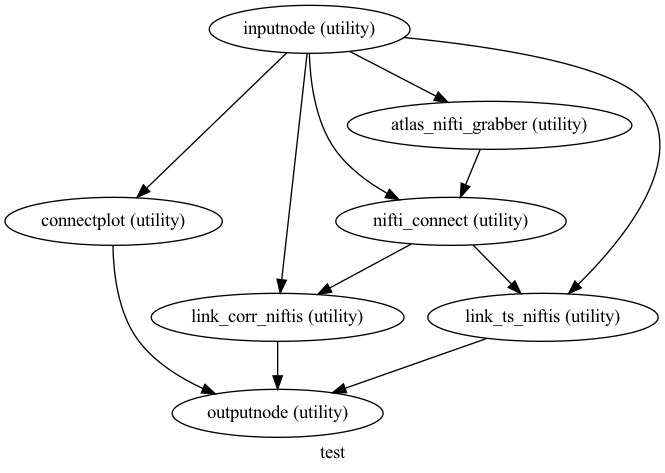

In [5]:
workflow.write_graph(graph2use='hierarchical')
Image(filename='graph.png')

In [6]:
# and run the workflow
workflow_res = workflow.run()

220930-09:13:08,834 nipype.workflow INFO:
	 Workflow test settings: ['check', 'execution', 'logging', 'monitoring']
220930-09:13:08,847 nipype.workflow INFO:
	 Running serially.
220930-09:13:08,849 nipype.workflow INFO:
	 [Node] Setting-up "test.connectplot" in "/private/var/folders/ph/w3cbhj9n16s9bx4l7gq3dq6m0000gn/T/tmpeep0r6ew/test/connectplot".
220930-09:13:08,859 nipype.workflow INFO:
	 [Node] Executing "connectplot" <nipype.interfaces.utility.wrappers.Function>
220930-09:13:08,862 nipype.workflow INFO:
	 [Node] Finished "connectplot", elapsed time 0.000677s.
220930-09:13:08,878 nipype.workflow INFO:
	 [Node] Setting-up "_atlas_nifti_grabber0" in "/private/var/folders/ph/w3cbhj9n16s9bx4l7gq3dq6m0000gn/T/tmp5wbd2by0/test/atlas_nifti_grabber/mapflow/_atlas_nifti_grabber0".
220930-09:13:08,885 nipype.workflow INFO:
	 [Node] Executing "_atlas_nifti_grabber0" <nipype.interfaces.utility.wrappers.Function>
220930-09:13:08,889 nipype.workflow INFO:
	 [Node] Finished "_atlas_nifti_grabber0

220930-09:13:09,353 nipype.workflow INFO:
	 [Node] Setting-up "_nifti_connect4" in "/private/var/folders/ph/w3cbhj9n16s9bx4l7gq3dq6m0000gn/T/tmpp242cdd0/test/nifti_connect/mapflow/_nifti_connect4".
220930-09:13:09,364 nipype.workflow INFO:
	 [Node] Executing "_nifti_connect4" <nipype.interfaces.utility.wrappers.Function>
220930-09:13:09,369 nipype.workflow INFO:
	 [Node] Finished "_nifti_connect4", elapsed time 0.000793s.
220930-09:13:09,385 nipype.workflow INFO:
	 [Node] Setting-up "_nifti_connect5" in "/private/var/folders/ph/w3cbhj9n16s9bx4l7gq3dq6m0000gn/T/tmpp242cdd0/test/nifti_connect/mapflow/_nifti_connect5".
220930-09:13:09,394 nipype.workflow INFO:
	 [Node] Executing "_nifti_connect5" <nipype.interfaces.utility.wrappers.Function>
220930-09:13:09,398 nipype.workflow INFO:
	 [Node] Finished "_nifti_connect5", elapsed time 0.000832s.
220930-09:13:09,408 nipype.workflow INFO:
	 [Node] Setting-up "_nifti_connect6" in "/private/var/folders/ph/w3cbhj9n16s9bx4l7gq3dq6m0000gn/T/tmpp242

220930-09:13:09,737 nipype.workflow INFO:
	 [Node] Setting-up "_link_corr_niftis10" in "/private/var/folders/ph/w3cbhj9n16s9bx4l7gq3dq6m0000gn/T/tmpkj79yppm/test/link_corr_niftis/mapflow/_link_corr_niftis10".
220930-09:13:09,743 nipype.workflow INFO:
	 [Node] Executing "_link_corr_niftis10" <nipype.interfaces.utility.wrappers.Function>
220930-09:13:09,746 nipype.workflow INFO:
	 [Node] Finished "_link_corr_niftis10", elapsed time 0.000599s.
220930-09:13:09,758 nipype.workflow INFO:
	 [Node] Setting-up "_link_corr_niftis11" in "/private/var/folders/ph/w3cbhj9n16s9bx4l7gq3dq6m0000gn/T/tmpkj79yppm/test/link_corr_niftis/mapflow/_link_corr_niftis11".
220930-09:13:09,765 nipype.workflow INFO:
	 [Node] Executing "_link_corr_niftis11" <nipype.interfaces.utility.wrappers.Function>
220930-09:13:09,767 nipype.workflow INFO:
	 [Node] Finished "_link_corr_niftis11", elapsed time 0.000394s.
220930-09:13:09,776 nipype.workflow INFO:
	 [Node] Setting-up "_link_corr_niftis12" in "/private/var/folders/p

In [7]:
workflow_res.nodes()

NodeView((test.atlas_nifti_grabber, test.nifti_connect, test.connectplot, test.link_ts_niftis, test.link_corr_niftis))

In [14]:
list(workflow_res.nodes())[4].result.outputs

Bunch(atlas_dict=[{'Schaefer100x17': 'Schaefer100x17_atlas_corr'},
       {'Schaefer200x17': 'Schaefer200x17_atlas_corr'},
       {'Schaefer300x17': 'Schaefer300x17_atlas_corr'},
       {'Schaefer400x17': 'Schaefer400x17_atlas_corr'},
       {'Schaefer500x17': 'Schaefer500x17_atlas_corr'},
       {'Schaefer600x17': 'Schaefer600x17_atlas_corr'},
       {'Schaefer700x17': 'Schaefer700x17_atlas_corr'},
       {'Schaefer800x17': 'Schaefer800x17_atlas_corr'},
       {'Schaefer900x17': 'Schaefer900x17_atlas_corr'},
       {'Schaefer1000x17': 'Schaefer1000x17_atlas_corr'},
       {'Glasser360': 'Glasser360_atlas_corr'},
       {'Gordon333': 'Gordon333_atlas_corr'},
       {'TianSubcortical': 'TianSubcortical_atlas_corr'}])

In [9]:
workflow_res.out_edges()

OutEdgeView([(test.atlas_nifti_grabber, test.nifti_connect), (test.nifti_connect, test.link_ts_niftis), (test.nifti_connect, test.link_corr_niftis)])